<a href="https://colab.research.google.com/github/JeanJulesBigeard/Getting-started-with-OpenCV/blob/master/Text_Detection/3_Improving_Tesseract_OCR_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">Improving Failure Cases in Tesseract OCR</font>
In this notebook, we will discuss the different methods, tips and tricks that we can use to improve the OCR output.

# <font color="blue">Install Tesseract</font>

In [0]:
!apt install libtesseract-dev tesseract-ocr > /dev/null
!pip install pytesseract > /dev/null

# <font color="blue">Import Libraries </font>

In [0]:
import pytesseract
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

# <font color="blue">Ways of Improving OCR Output </font>
There are a few ways we can improve the OCR output. They are listed below:
1. **Improve Image Quality** - For best performance, The scanned documents/images should be taken at the very good resolution so that the image contains more information. However, this is something that cannot be controlled once we have an image. So, we are not concerned about this tip!
1. **Save image in Lossless format** - For best results, the image should be saved in TIFF format which is a lossless image format. 
1. **Increase Text Size** - In many cases, the desired text might be very small and Tesseract will not be able to detect very small text. In these cases, we should increase text size for better accuracy
1. **Image Enhancement** - Sometimes, the image might be Noisy/blurry or of low contrast. In those cases, we might use image processing techniques to enhance the quality of the image like:
  - by either denoising the image (this gets rid of the aliasing noize present at the bondaries of the characters)
  - sharpening the image 
  - improving the contrast of the image
  - performing morphological operations on the image like thresholding followed erosion / dilation
1. **Detect Text separately** - As we saw in the last 3 examples in the previous notebook that no text was recognized. So, if we can detect text boxes separately using some text detection algorithm and provide the box to Tesseract, it might be able to recognize the characters.
1. **Use correct parameters for Tesseract** - We had only seen how to change the language in Tesseract. But, we can also change the way the characters/words are segmented using the **`psm`** flag. We will discuss this in this notebook.

Let us see how we can use the above tips to get a better output from Tesseract.

# <font color="blue">Understanding Tesseract Page Segmentation Options </font>
The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes(psm) by tesseract -

0. Orientation and script detection (OSD) only.
1. Automatic page segmentation with OSD.
1. Automatic page segmentation, but no OSD, or OCR.
1. Fully automatic page segmentation, but no OSD. (Default)
1. Assume a single column of text of variable sizes.
1. Assume a single uniform block of vertically aligned text.
1. Assume a single uniform block of text.
1. Treat the image as a single text line.
1. Treat the image as a single word.
1. Treat the image as a single word in a circle.
1. Treat the image as a single character.
1. Sparse text. Find as much text as possible in no particular order.
1. Sparse text with OSD.
1. Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

### <font color="green">OCR Engine Modes (OEM)</font>
You can choose which OCR engine to use among the 4 options available in Teseract 4.x
0. Legacy engine only.
1. Neural nets LSTM engine only.
2. Legacy + LSTM engines.
3. Default, based on what is available.

# <font color="blue">Test Image 1: Camera capture of a Book</font>


In [0]:
!wget https://www.dropbox.com/s/uwrdek4jjac4ysz/book2.jpg?dl=1 -O book2.jpg --quiet

### <font color="green">Downloaded Image</font>

<img src="https://www.dropbox.com/s/uwrdek4jjac4ysz/book2.jpg?dl=1" width=500>

In [0]:
book2_text = pytesseract.image_to_string('book2.jpg')
print(book2_text)

The Impact of the Highly Improbable


### <font color="green">Observation </font>
We saw this example in the last notebook. The major reason is the relatively cluttered background and low contrast of the white text on orange background. Another issue with these kind of images is the variability of text size. **"Black"** is written in extra-large size whereas **"The impact of"** is normal.

In [0]:
img = cv2.imread('book2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
book2_text = pytesseract.image_to_string(img)
print(book2_text)

y

hris Anderson,
author of The Long Tail

Financial Times

   

soa

The Impact of the Highly Improbable

Nassim Nicholas Taleb


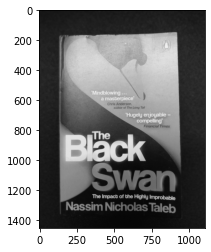

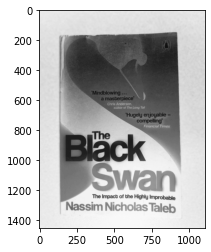

y

awe
author of The Long Tail

aero) a

   

Swan

The Impact of the Highly Improbable

Nassim Nicholas Taleb


In [0]:
img = cv2.imread('book2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()
imgNeg = 255-img
plt.imshow(imgNeg, cmap='gray')
plt.show()
book2_text = pytesseract.image_to_string(imgNeg)
print(book2_text)

# <font color="blue">Test Image 2: Driving License </font>

In [0]:
!wget https://www.dropbox.com/s/rdaha84n8jo3bmw/dl.jpg?dl=0 -O dl.jpg --quiet

### <font color="green">Downloaded Image</font>
![](https://www.dropbox.com/s/rdaha84n8jo3bmw/dl.jpg?dl=1)

### <font color="green">Without pre-processing </font>

DRIVER LICENSE

= a

123 486 789 Sein States,
tate

MURPHY,

BRENNA ANNA C
bomsun scm LO wl
CUO ULeTe Ne F
seraaiin NoNE™ ms |
08/20/2020 BeELZ™ BRO q

  

IVANYWHERE STREET
ITY, DL

500 asosse7eo 67890-1071 ah NA Yuare


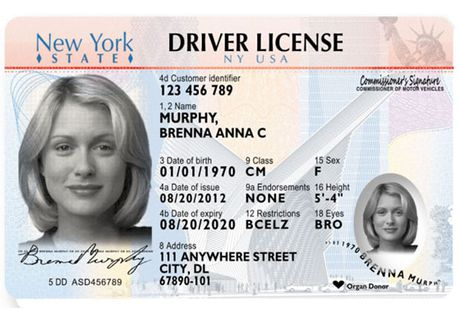

In [0]:
dl_text = pytesseract.image_to_string('dl.jpg')
print(dl_text)
Image("dl.jpg")

### <font color="green">Observation </font>
- It is unable to detect small text
- Same issue with cluttered background.

### <font color="green">First Try: Increase the Image size by 2X</font>

New York DRIVER LICENSE
ONSTTWAS TEND,

NY USA

123 456 789 eerie,

>
m

 

1,2 Name
MURPHY,
BRENNA ANNA C

EO
ovvouii970 cH

oeizorzoi2 NONE si eA
08/20/2020 BCELZ

oe Pom

  

iii at ANYWHERE STREET
"ten NA

7
50D ASD456789 §1896-101 YP ocpin Donor 4 Maye


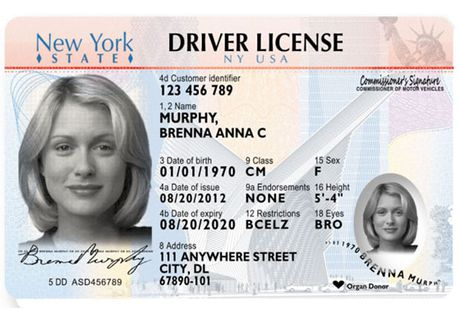

In [0]:
img = cv2.imread('dl.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
text8 = pytesseract.image_to_string(img)
print(text8)
Image("dl.jpg")

### <font color="green">Observation</font>
We can see that upon increasing the text size, it is able to detect some of the text written in a smaller font for example - `Name`, `Donor`. However, it is still not able to detect all of the small text. Let us fix his in the next step.

### <font color="green">Second Try: Convert the image to gray</font>
We can see that the text which has low contrast is not recognized properly. Note that it is at least able to see that there is some text, but cannot decipher it. 

One way to fix it is converting it to Gray which might result in a better contrast.

TASTES eS NY USA I ee.
46 Customer identifer iy 7

123 456 789 Senrsisaete,
1,2 Name

MURPHY,

BRENNA ANNA C

New York DRIVER LICENSE

3 Date of birth 9 Class 15 Sex
01/01/1970 CM F

4a Date of issue Ga Endorsements 16 Height
08/20/2012 NONE 5'-4" £
4b Date of expiry 12 Restrictions 18 Eyes

08/20/2020 BCELZ BRO
i195

B Address

: 111 ANYWHERE STREET
G  CITY,DL

5 DD AS0456789 67890-101

  

P organ Donor A Nuare


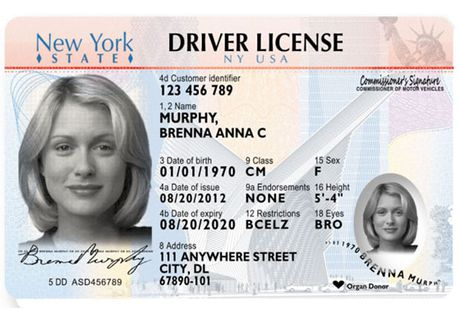

In [0]:
img = cv2.imread('dl.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
text8 = pytesseract.image_to_string(img)
print(text8)
Image("dl.jpg")

### <font color="green">Observation</font>
It was able to detect almost all the text - big or small with the above two changes. You should **note that these steps might not work for other type of images and you may need to do some experiments to see what steps work for your type of documents/images**.


Just for instance, if you do not increase the image size thinking that the contrast issue might give you better results, then it wont work as shown below:

### <font color="green">Failed Try: Converting to Gray without resizing</font>

500 Aso«s6769

DRIVER LICENSE

“S.costner enter

123 456 789
1.2Nane

MURPHY,
BRENNA ANNA C
Osectbim > gcse
01/01/1970 CM
4aDateolisve Sa dere
08/20/2012 NONE

SbDatectexciny 12 Rasrebons
08/20/2020 BCELZ

Aces
LIL ANYWHERE STREET
ITY, DL
67896-101,

ets

See,

1580
F

oe

 

 

TBE
BRO

 

‘Ceataen AGG


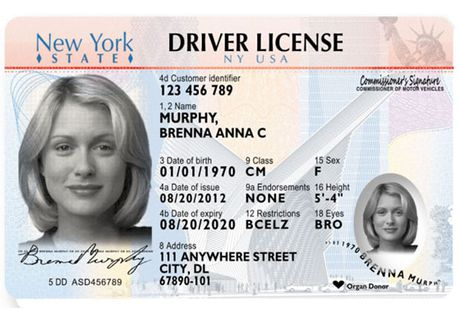

In [0]:
img = cv2.imread('dl.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
text8 = pytesseract.image_to_string(img)
print(text8)
Image("dl.jpg")

# <font color="blue">Test Image 3: Close-up of License Plate </font>

In [0]:
!wget "https://www.dropbox.com/s/xz24vxrp4uvvnri/license_plate.jpg?dl=0" -O lp1.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/xz24vxrp4uvvnri/license_plate.jpg?dl=1" width=500>

In [0]:
lp_text = pytesseract.image_to_string('lp1.jpg')
print(lp_text)

Tiles)


### <font color="green">Observation </font>
Even though the text is very clear to us, Tesseract finds it difficult to recognize. The major issue is with contrast. 

### <font color="green">Try 1: Using Image Processing</font>


### <font color="green">1A - Converting to Gray </font>

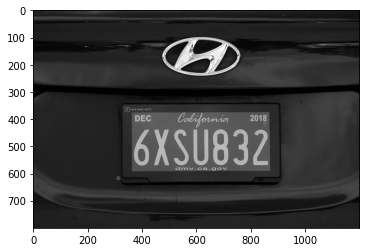

Tilley


In [0]:
img = cv2.imread('lp1.jpg')
# Convert to grayscale
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray,cmap='gray')
plt.show()
text = pytesseract.image_to_string(imgGray)
print(text)

### <font color="green">1B - Converting to Negative</font>

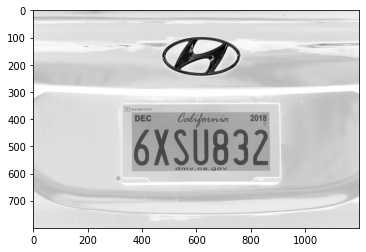

T]reviver auto


In [0]:
imgGrayNeg = 255 - imgGray
plt.imshow(imgGrayNeg,cmap='gray')
plt.show()
text = pytesseract.image_to_string(imgGrayNeg)
print(text)

### <font color="green">1C - Converting to Binary using Thresholding</font>

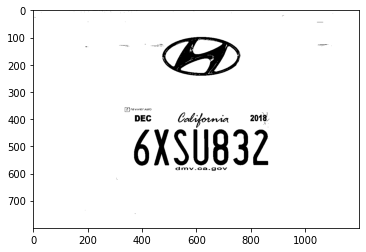

6xSU832


In [0]:
th, threshImg = cv2.threshold(imgGrayNeg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(threshImg, cmap='gray')
plt.show()

text = pytesseract.image_to_string(threshImg)
print(text)

### <font color="green">Observation </font>
Finally! We are able to get the text after so much of processing the image.

### <font color="green">Try 2: Using PSM option</font>

Here, we see that the text is almost centered and we can ask Tesseract to not look for Text all over the image, but only look for text which can make up a single block. This might give us a better result.

In [0]:
config = ('--psm 6')
lp_text_psm6 = pytesseract.image_to_string('lp1.jpg', config=config)
print(lp_text_psm6)

6xSU832


### <font color="green">Observation</font>
Voila! Just changing the **`psm`** option did the trick!

But what if you wanted to extract other text as well? 

Can you increase the size and assume it will detect everything? Let us give it a try!


In [0]:
config = ('--psm 6')
img = cv2.imread('lp1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
lp_text_psm6 = pytesseract.image_to_string(img, config=config)
print(lp_text_psm6)

— >
S J
—_— GL — a
Ma tates)
DEC Cchifornin = 2018
Aamv.ca.gov
S)


So, even though it recognizes a few small characters, it does not recognize the number anymore. 

# <font color="blue">Test Image 4: Street Sign</font>

In [0]:
!wget https://www.dropbox.com/s/uwlnxiihqgni57o/streetsign1.jpg?dl=0 -O streetsign1.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/uwlnxiihqgni57o/streetsign1.jpg?dl=1" width=500>

In [0]:
ss1_text = pytesseract.image_to_string('streetsign1.jpg')
print(ss1_text)

### <font color="green">Observation</font>
There are multiple issues:
- text is not aligned. It is either rotated within the plane or into the plane.
- Large variation in Text size
- Background clutter

These issues are really difficult to be fixed using the methods described till now. 

Suppose we get a cropped region of text from the above image, can Tesseract identify the text written inside it? Let's check

In [0]:
!wget https://www.dropbox.com/s/pbfcc02azekx4kq/streetsign1_crop1.jpg?dl=0 -O ss1_crop1.jpg --quiet

### <font color="green">Downloaded Cropped Images</font>
![](https://www.dropbox.com/s/pbfcc02azekx4kq/streetsign1_crop1.jpg?dl=1)

ab)
-— ae | aN


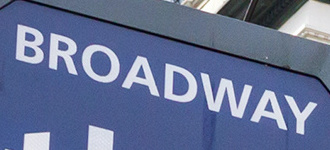

In [0]:
config = ('--psm 6')
ss1_crop1_text = pytesseract.image_to_string('ss1_crop1.jpg',config=config)
print(ss1_crop1_text)
Image("ss1_crop1.jpg")

### <font color="green">Observation </font>
The issue is that the image are rotated and misaligned. Let us see if we can align the cropped regions and get the desired output?

In [0]:
!wget https://www.dropbox.com/s/2y0mhmfnyvvz9tf/streetsign1_crop1_aligned.png?dl=0 -O crop1_aligned.png --quiet

BROADWAY


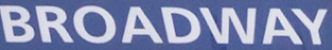

In [0]:
config = ('--psm 6')
ss1_crop1_aligned_text = pytesseract.image_to_string('crop1_aligned.png',config=config)
print(ss1_crop1_aligned_text)
Image("crop1_aligned.png")

So, it was able to recognize the text when it was aligned. Thus, for certain cases where the text is scattered over the image and be of varied size, we want to perform OCR in 2 stages - Text Detection followed by Text Recognition.

In the next section, We will discuss how to perform Text Detection to help with OCR.

# <font color="blue">Common Pitfalls</font>
Even with all these tricks, it is important to keep a note of common pitfalls to avoid:
1. If the image contains too much variation in text size, it is difficult to recognize all the text, because if you want to recognize small text (by increasing the image size) , then the bigger text will suffer and vice-versa. So, it is important to focus on what information you want to extract.
1. It is not wise to always convert to grayscale image for natural images.
1. Whatever processing you think of, it is advisable to check on a few images in your dataset before deploying it to production as the algorithm might not be as robust as you expect it to be.